In [1]:
get_ipython().magic('matplotlib inline')
import pandas as pd
import numpy as np
import datetime as dt
import ast
import sys
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import datetime
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_order

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [3]:
df = pd.read_csv('./ted_main.csv')


In [4]:
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
         'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]


<h3>Convert the Unix timestamps into a human readable format<h3>

In [5]:
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [6]:
df['published_date']

0       26-06-2006
1       26-06-2006
2       26-06-2006
3       26-06-2006
4       27-06-2006
           ...    
2545    19-09-2017
2546    20-09-2017
2547    21-09-2017
2548    21-09-2017
2549    22-09-2017
Name: published_date, Length: 2550, dtype: object

In [7]:
df['published_date'].describe()

count           2550
unique          2336
top       04-04-2007
freq              20
Name: published_date, dtype: object

In [8]:
df[['title', 'main_speaker', 'views', 'published_date', 'comments']].loc[pd.DatetimeIndex(df['published_date']).year == 2015].sort_values('views', ascending=False)

,title,main_speaker,views,published_date,comments
2109,What makes a good life? Lessons from the longe...,Robert Waldinger,16601927,23-12-2015,527
1940,The price of shame,Monica Lewinsky,11443190,20-03-2015,1355
2076,How to stay calm when you know you'll be stressed,Daniel Levitin,9163813,30-10-2015,129
1981,Rethinking infidelity ... a talk for anyone wh...,Esther Perel,8218896,21-05-2015,370
2011,Everything you think you know about addiction ...,Johann Hari,7841509,09-07-2015,767
...,...,...,...,...,...
2094,How we're growing baby corals to rebuild reefs,Kristen Marhaver,729236,01-12-2015,21
1893,A forensic anthropologist who brings closure f...,Fredy Peccerelli,712971,08-01-2015,18
1898,Poetry that frees the soul,Cristina Domenech,687808,16-01-2015,49
2072,Social services are broken. How we can fix them,Hilary Cottam,684300,26-10-2015,80


<h3> Read transcripts.csv file and merge it to the main dataframe<h3>

In [9]:
df2 = pd.read_csv('./transcripts.csv')
df2.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [10]:
df3 = pd.merge(left=df,right=df2, how='left', left_on='url', right_on='url')

In [11]:
df3['transcript'] = df3['transcript'].fillna('')
df3['wc'] = df3['transcript'].apply(lambda x: len(x.split()))

In [12]:
df3['wpm'] = df3['wc']/df3['duration']
df3['wpm'].describe()

count    2553.000000
mean        2.369129
std         0.660589
min         0.000000
25%         2.184486
50%         2.483636
75%         2.749744
max         4.122748
Name: wpm, dtype: float64

In [13]:
Total = df['duration'].sum()
print (Total)

2107601


<h3> Most viewed videos<h3>

In [14]:
pop_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:20]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,24-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,25-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,16-09-2009
837,The power of vulnerability,Brené Brown,31168150,05-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,05-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,09-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,26-02-2008
5,Why we do what we do,Tony Robbins,20685401,01-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,07-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,26-10-2012


<h3> Most commented videos<h3>

In [15]:
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


<h3>Calculate total ratings<h3>

In [16]:
import ast
df['ratings'] = df['ratings'].apply(lambda x: ast.literal_eval(x))
sum = 0
sum_list = []
for index, row in df.iterrows():
    sum = 0
    for dct in row['ratings']:
    
        if (int(dct['id']) in (1, 3, 7, 8, 9, 10, 22, 23, 24)):
            sum += int(dct['count'])
        else:
            sum -= int(dct['count'])
    sum_list.append(sum)
    
df['total_ratings'] = sum_list

<h3> Add published year column to the dataframe<h3>

In [17]:
year = []
for index, row in df.iterrows():
        
        year.append(int(row['published_date'][6:]))

In [18]:
df['year'] = year

In [19]:
df

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,total_ratings,year
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,89226,2006
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,24-02-2006,26-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,1402,2006
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,23-02-2006,26-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,1830,2006
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,25-02-2006,26-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,3246,2006
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,21-02-2006,27-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,24504,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,Duarte Geraldino: What we're missing in the de...,What we're missing in the debate about immigra...,"Between 2008 and 2016, the United States depor...",Duarte Geraldino,Journalist,1,476,TED2017,05-06-2017,19-09-2017,17,"['TED Residency', 'United States', 'community'...",4,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/duarte_geraldino_wha...,450430,156,2017
2546,Armando Azua-Bustos: The most Martian place on...,The most Martian place on Earth,How can you study Mars without a spaceship? He...,Armando Azua-Bustos,Astrobiologist,1,290,TED2017,23-04-2017,20-09-2017,6,"['Mars', 'South America', 'TED Fellows', 'astr...",3,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/armando_azua_bustos_...,417470,123,2017
2547,Radhika Nagpal: What intelligent machines can ...,What intelligent machines can learn from a sch...,Science fiction visions of the future show us ...,Radhika Nagpal,Robotics engineer,1,651,TED2017,23-04-2017,21-09-2017,10,"['AI', 'ants', 'fish', 'future', 'innovation',...",1,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/radhika_nagpal_what_...,375647,116,2017
2548,Theo E.J. Wilson: A black man goes undercover ...,A black man goes undercover in the alt-right,In an unmissable talk about race and politics ...,Theo E.J. Wilson,Public intellectual,1,1100,TEDxMileHigh,07-07-2017,21-09-2017,32,"['Internet', 'TEDx', 'United States', 'communi...",1,"[{'id': 11

<h3> Sort the dataframe base on ratings, comments and views<h3>

In [20]:
df[['title', 'main_speaker', 'views', 'total_ratings']].sort_values('total_ratings', ascending=False)[:10]

,title,main_speaker,views,total_ratings
0,Do schools kill creativity?,Ken Robinson,47227110,89226
201,My stroke of insight,Jill Bolte Taylor,21190883,66207
1346,Your body language may shape who you are,Amy Cuddy,43155405,61660
837,The power of vulnerability,Brené Brown,31168150,57510
677,How great leaders inspire action,Simon Sinek,34309432,50645
1030,How to live before you die,Steve Jobs,8744428,35170
1129,The happy secret to better work,Shawn Achor,16209727,31204
176,Underwater astonishments,David Gallo,13926113,28607
530,The danger of a single story,Chimamanda Ngozi Adichie,13298341,28359
1163,The power of introverts,Susan Cain,17629275,28153


In [21]:
df[['title', 'main_speaker', 'views', 'comments']].sort_values('comments', ascending=False)[:10]

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


In [22]:
df[['title', 'main_speaker', 'views', 'total_ratings']].sort_values('views', ascending=False)[:10]

,title,main_speaker,views,total_ratings
0,Do schools kill creativity?,Ken Robinson,47227110,89226
1346,Your body language may shape who you are,Amy Cuddy,43155405,61660
677,How great leaders inspire action,Simon Sinek,34309432,50645
837,The power of vulnerability,Brené Brown,31168150,57510
452,10 things you didn't know about orgasm,Mary Roach,22270883,8413
1776,How to speak so that people want to listen,Julian Treasure,21594632,15500
201,My stroke of insight,Jill Bolte Taylor,21190883,66207
5,Why we do what we do,Tony Robbins,20685401,11878
2114,This is what happens when you reply to spam email,James Veitch,20475972,11704
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,6348


<h3> Add title word count as a column to the dataframe<h3>

In [23]:
Words_in_title = []
for item in df['title']:
    Words_in_title.append(len(item.split()))
        
df['words_in_title'] = Words_in_title

<h3>Plots<h3>

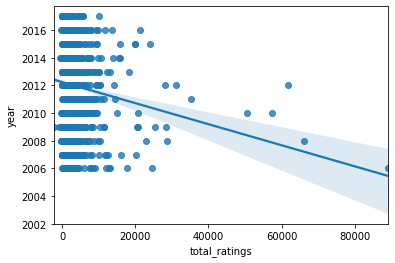

In [24]:
sns.regplot(x='total_ratings', y='year', data=df)
plt.show()

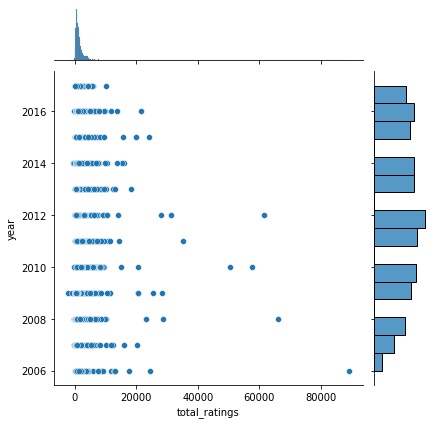

In [25]:
sns.jointplot(x='total_ratings', y='year', data=df)
plt.show()

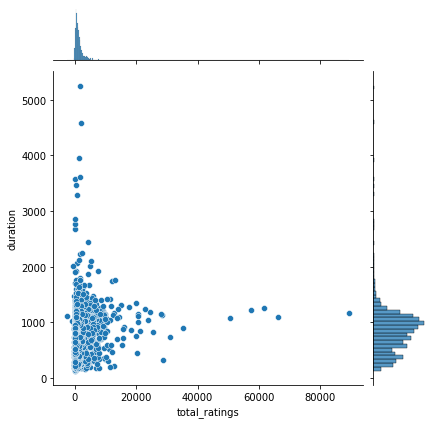

In [26]:
sns.jointplot(x='total_ratings', y='duration', data=df)
plt.show()

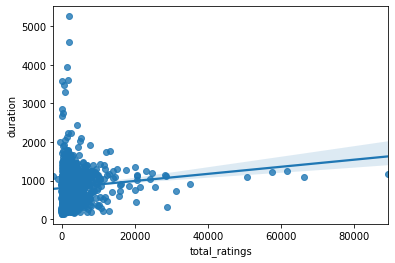

In [27]:
sns.regplot(x='total_ratings', y='duration', data=df)
plt.show()

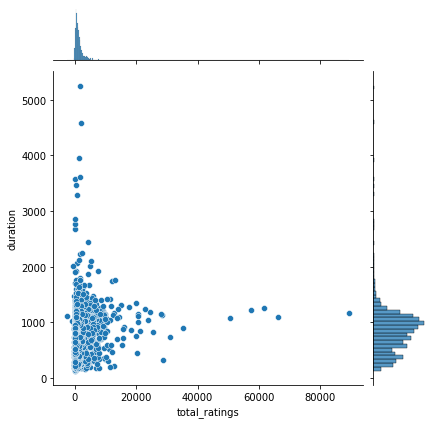

In [28]:
sns.jointplot(x='total_ratings', y='duration', data=df)
plt.show()

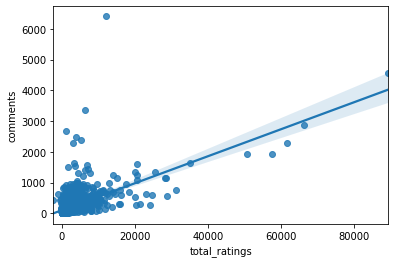

In [29]:
sns.regplot(x='total_ratings', y='comments', data=df)


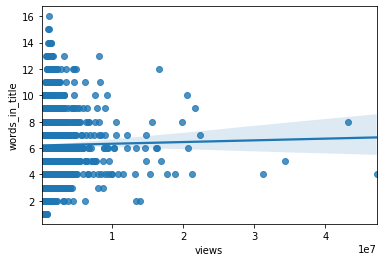

In [30]:
sns.regplot(x='views', y='words_in_title', data=df)
plt.show()

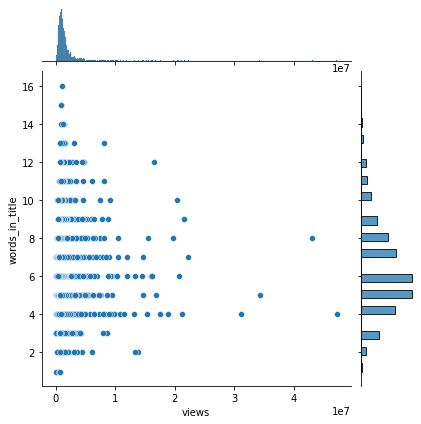

In [31]:
sns.jointplot(x='views', y='words_in_title', data=df)
plt.show()

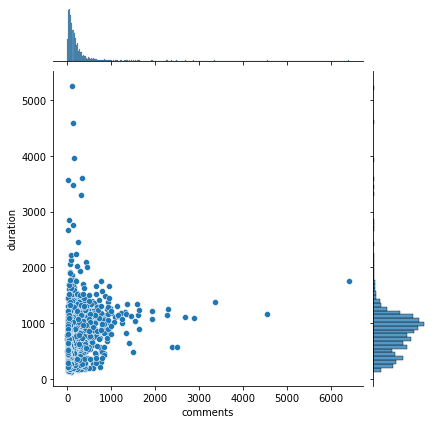

In [32]:
sns.jointplot(x='comments', y='duration', data=df)
plt.show()

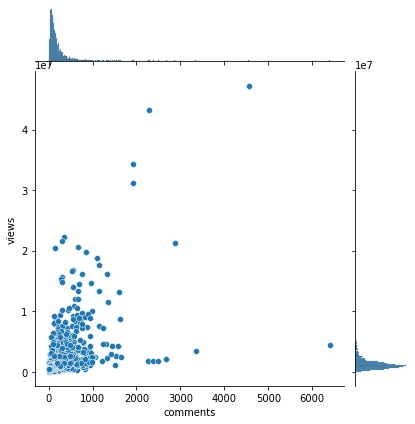

In [33]:
sns.jointplot(x='comments', y='views', data=df)
plt.show()

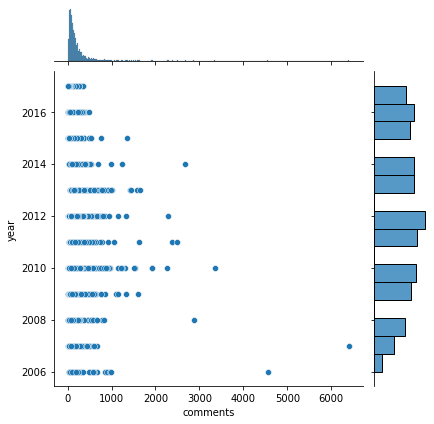

In [34]:
sns.jointplot(x='comments', y='year', data=df)
plt.show()

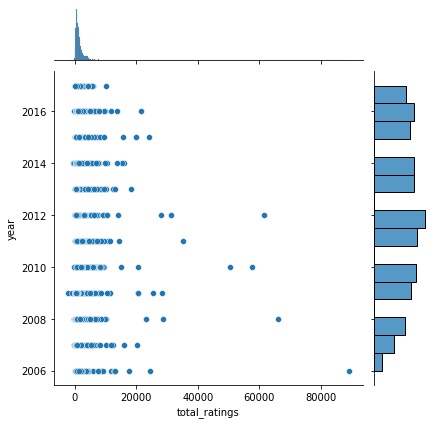

In [35]:
sns.jointplot(x='total_ratings', y='year', data=df)
plt.show()

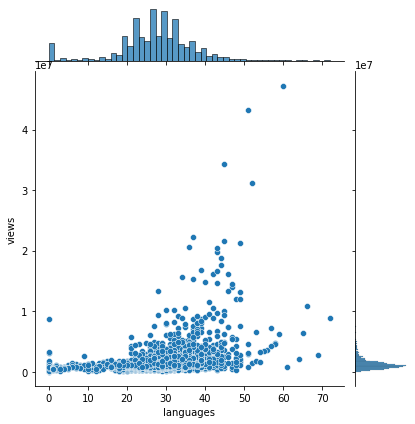

In [36]:
sns.jointplot(x='languages', y='views', data=df)
plt.show()

In [37]:
df['duration'] = df['duration']//60

<h3>Find five top speakers<h3>

In [38]:
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(5)
speaker_df.head(5).to_csv('./topspeakers.csv')

<h3> Calculate total ratings for each top speakers <h3>

In [39]:
def ratings(speaker_name):
    each_video = []
    ratings = []
    total = 0
    Ingenious = 0
    Funny = 0
    Beautiful = 0
    Courageous = 0
    Informative = 0
    Inspiring = 0
    Fascinating = 0
    Jaw_dropping = 0
    Persuasive = 0
    Confusing = 0
    Longwinded = 0
    Unconvincing = 0
    OK = 0
    Obnoxious = 0
    
    for index, row in df.iterrows():
        
        if (row['main_speaker'] == speaker_name):
            
            for dct in row['ratings']:

                if (dct['id'] == 9):
                    Ingenious += dct['count']

                if (dct['id'] == 7):
                    Funny += dct['count']

                if (dct['id'] == 1):
                    Beautiful += dct['count']

                if (dct['id'] == 3):
                    Courageous += dct['count']

                if (dct['id'] == 8):
                    Informative += dct['count']

                if (dct['id'] == 10):
                    Inspiring += dct['count']

                if (dct['id'] == 22):
                    Fascinating += dct['count']

                if (dct['id'] == 23):
                    Jaw_dropping += dct['count']

                if (dct['id'] == 24):
                    Persuasive += dct['count']

                if (dct['id'] == 2):
                    Confusing += dct['count']

                if (dct['id'] == 11):
                    Longwinded += dct['count']

                if (dct['id'] == 21):
                    Unconvincing += dct['count']

                if (dct['id'] == 25):
                    OK += dct['count']

                if (dct['id'] == 26):
                    Obnoxious += dct['count']
            
            
            
    ratings.append({'Ingenious': Ingenious, 'Funny': Funny, 'Beautiful':Beautiful,
                    'Courageous': Courageous, 'Informative': Informative, 'Inspiring': Inspiring,
                    'Fascinating': Fascinating, 'Jaw_dropping': Jaw_dropping,
                    'Persuasive': Persuasive, 'Confusing': Confusing, 'Longwinded': Longwinded,
                    'Unconvincing': Unconvincing, 'OK':OK, 'Obnoxious': Obnoxious})

    total = (Ingenious + Funny + Beautiful + Courageous + Informative + Inspiring + Fascinating + Jaw_dropping + Persuasive) - (Confusing + Longwinded + Unconvincing + OK + Obnoxious)
    
    return ratings, total

In [40]:
ratings('Hans Rosling')

([{'Ingenious': 5891,
   'Funny': 4705,
   'Beautiful': 1774,
   'Courageous': 1103,
   'Informative': 12583,
   'Inspiring': 7723,
   'Fascinating': 9967,
   'Jaw_dropping': 10193,
   'Persuasive': 7321,
   'Confusing': 222,
   'Longwinded': 221,
   'Unconvincing': 328,
   'OK': 761,
   'Obnoxious': 169}],
 59559)

In [41]:
ratings('Juan Enriquez')

([{'Ingenious': 1189,
   'Funny': 1036,
   'Beautiful': 264,
   'Courageous': 505,
   'Informative': 3760,
   'Inspiring': 1886,
   'Fascinating': 4454,
   'Jaw_dropping': 2610,
   'Persuasive': 2595,
   'Confusing': 172,
   'Longwinded': 213,
   'Unconvincing': 465,
   'OK': 436,
   'Obnoxious': 194}],
 16819)

In [42]:
ratings('Rives')

([{'Ingenious': 2022,
   'Funny': 5073,
   'Beautiful': 1798,
   'Courageous': 140,
   'Informative': 371,
   'Inspiring': 923,
   'Fascinating': 1571,
   'Jaw_dropping': 560,
   'Persuasive': 152,
   'Confusing': 253,
   'Longwinded': 179,
   'Unconvincing': 319,
   'OK': 736,
   'Obnoxious': 218}],
 10905)

In [43]:
ratings('Marco Tempest')

([{'Ingenious': 2380,
   'Funny': 2018,
   'Beautiful': 2918,
   'Courageous': 99,
   'Informative': 662,
   'Inspiring': 1406,
   'Fascinating': 3640,
   'Jaw_dropping': 2631,
   'Persuasive': 224,
   'Confusing': 114,
   'Longwinded': 150,
   'Unconvincing': 424,
   'OK': 808,
   'Obnoxious': 190}],
 14292)

In [44]:
ratings('Clay Shirky')

([{'Ingenious': 577,
   'Funny': 175,
   'Beautiful': 105,
   'Courageous': 542,
   'Informative': 3455,
   'Inspiring': 1949,
   'Fascinating': 1442,
   'Jaw_dropping': 552,
   'Persuasive': 2748,
   'Confusing': 84,
   'Longwinded': 117,
   'Unconvincing': 124,
   'OK': 344,
   'Obnoxious': 56}],
 10820)

<h3>Calculate ratings for each video of speakers<h3>

In [45]:
def ratings_each_video(speaker_name):
    each_video = []
    total = 0
    positive = 0
    positive_list = []
    negative = 0
    negative_list = []
    ratings = []
    Ingenious = 0
    Funny = 0
    Beautiful = 0
    Courageous = 0
    Informative = 0
    Inspiring = 0
    Fascinating = 0
    Jaw_dropping = 0
    Persuasive = 0
    Confusing = 0
    Longwinded = 0
    Unconvincing = 0
    OK = 0
    Obnoxious = 0
    
    for index, row in df.iterrows():
        
        if (row['main_speaker'] == speaker_name):
            total = 0
            positive = 0
            negative = 0
            for dct in row['ratings']:

                
            
                total += dct['count']
                
                if (dct['name'] in ('Beautiful', 'Ingenious', 'Funny', 'Courageous', 'Informative', 
                                    'Fascinating', 'Jaw-dropping', 'Persuasive', 'Inspiring')):
                    positive += dct['count']
                else:
                    negative += dct['count']
                    
            each_video.append(total)
            positive_list.append(positive)
            
            negative_list.append(negative)

            #print(total)


    total = Ingenious + Funny + Inspiring + Beautiful + Courageous + Informative + Fascinating 
    + Jaw_dropping + Persuasive + Confusing + Longwinded + Unconvincing + OK + Obnoxious
    
    return each_video, positive_list, negative_list


In [46]:
ratings_each_video('Hans Rosling')

([25620, 12783, 1565, 3132, 3926, 4637, 2493, 4716, 4089],
 [25062, 12596, 1478, 3065, 3792, 4345, 2425, 4541, 3956],
 [558, 187, 87, 67, 134, 292, 68, 175, 133])

In [47]:
ratings_each_video('Juan Enriquez')

([1374, 2829, 5260, 4632, 1493, 1490, 2701],
 [1293, 2456, 4916, 4406, 1221, 1409, 2598],
 [81, 373, 344, 226, 272, 81, 103])

In [48]:
ratings_each_video('Rives')

([2649, 1028, 4960, 1824, 1172, 2682],
 [2299, 980, 4346, 1406, 1105, 2474],
 [350, 48, 614, 418, 67, 208])

In [49]:
ratings_each_video('Marco Tempest')

([7303, 1631, 2150, 3040, 1919, 1621],
 [6861, 1399, 1925, 2873, 1720, 1200],
 [442, 232, 225, 167, 199, 421])

In [50]:
ratings_each_video('Clay Shirky')

([1930, 2516, 1846, 4293, 1685],
 [1800, 2294, 1659, 4161, 1631],
 [130, 222, 187, 132, 54])

<h3>Calculate video durations of speakers<h3>

In [51]:
def durations(speaker_name):
    
    speaker_duration = []
    
    for index, row in df.iterrows():
        
        if (row['main_speaker'] == speaker_name):

            speaker_duration.append(row['duration'])
    
    return speaker_duration

<h3>Calculate total views of speakers' videos<h3>

In [52]:
def views_total(speaker_name):
    
    views = []
    sum = 0
    
    for index, row in df.iterrows():
        
        if (row['main_speaker'] == speaker_name):

            sum += row['views']
    views.append(sum)
    
    return views

In [53]:
views_total('Hans Rosling')


[27567127]

In [54]:
views_total('Juan Enriquez')


[12559364]

In [55]:
views_total('Rives')


[9988660]

In [56]:
views_total('Marco Tempest')


[13356940]

In [57]:
views_total('Clay Shirky')

[6250431]

<h3>Calculate total comment count of speakers' videos<h3>

In [58]:
def comments_total(speaker_name):
    
    comments = []
    sum = 0
    
    for index, row in df.iterrows():
        
        if (row['main_speaker'] == speaker_name):

            sum += row['comments']
    comments.append(sum)
    
    return comments

In [59]:
comments_total('Hans Rosling')

[3085]

In [60]:
comments_total('Juan Enriquez')


[1384]

In [61]:
comments_total('Rives')

[773]

In [62]:
comments_total('Marco Tempest')

[951]

In [63]:
comments_total('Clay Shirky')

[1593]

In [64]:
def views_per_video(speaker_name):
    
    views = []
    
    for index, row in df.iterrows():
        
        if (row['main_speaker'] == speaker_name):

            views.append(row['views'])
    
    return views

In [65]:
def comments_per_video(speaker_name):
    
    comments = []
    
    for index, row in df.iterrows():
        
        if (row['main_speaker'] == speaker_name):
            comments.append(row['comments'])
    
    return comments

In [66]:
def published_date(speaker_name):
    
    published_date = []
    
    for index, row in df.iterrows():
        
        if (row['main_speaker'] == speaker_name):

            published_date.append(row['published_date'])
    
    return published_date

In [67]:
published_date('Clay Shirky')

['10-07-2008', '15-06-2009', '28-06-2010', '18-01-2012', '25-09-2012']

In [68]:
def year(speaker_name):
    
    year = []
    
    for index, row in df.iterrows():
        
        if (row['main_speaker'] == speaker_name):
            year.append(int(row['published_date'][6:]))
    
    return year

In [69]:
year('Hans Rosling')

[2006, 2007, 2009, 2009, 2009, 2010, 2010, 2011, 2012]

In [70]:
df['main_speaker']

0              Ken Robinson
1                   Al Gore
2               David Pogue
3             Majora Carter
4              Hans Rosling
               ...         
2545       Duarte Geraldino
2546    Armando Azua-Bustos
2547         Radhika Nagpal
2548       Theo E.J. Wilson
2549      Karoliina Korppoo
Name: main_speaker, Length: 2550, dtype: object

In [71]:
def title(speaker_name):
    
    title = []
    
    for index, row in df.iterrows():
        
        if (row['main_speaker'] == speaker_name):
            title.append(row['title'])
    
    return title

<h3> Create a dataframe for each speaker<h3>

In [72]:
Hans_Rosling= [title('Hans Rosling'), published_date('Hans Rosling'), ratings('Hans Rosling'), durations('Hans Rosling'), views_per_video('Hans Rosling'), 
               comments_per_video('Hans Rosling'), year('Hans Rosling')]

In [73]:
dfHans_Rosling = pd.DataFrame(Hans_Rosling).transpose().reset_index()

dfHans_Rosling.columns = ['id', 'rating', 'title', 'published_date','duration', 'views', 'comments', 'year']

dfHans_Rosling.set_index('id', inplace = True)
dfHans_Rosling.to_csv('./Result/Hans_Rosling.csv')

In [74]:
Juan_Enriquez = [title('Juan Enriquez'), published_date('Juan Enriquez'), ratings('Juan Enriquez'), durations('Juan Enriquez'), views_per_video('Juan Enriquez'), 
               comments_per_video('Juan Enriquez'), year('Juan Enriquez')]

In [75]:
dfJuan_Enriquez = pd.DataFrame(Juan_Enriquez).transpose().reset_index()

dfJuan_Enriquez.columns = ['id', 'title', 'rating', 'published_date', 'duration', 'views', 'comments', 'year']

dfJuan_Enriquez.set_index('id', inplace = True)
dfJuan_Enriquez.to_csv('./Result/Juan_Enriquez.csv')

In [76]:
Rives = [title('Rives'), published_date('Rives'), ratings('Rives'), durations('Rives'), views_per_video('Rives'), 
               comments_per_video('Rives'), year('Rives')]

In [77]:
dfRives = pd.DataFrame(Rives).transpose().reset_index()

dfRives.columns = ['id', 'title', 'rating', 'published_date', 'duration', 'views', 'comments', 'year']

dfRives.set_index('id', inplace = True)
dfRives.to_csv('./Result/Rives.csv')

In [78]:
Marco_Tempest = [title('Marco Tempest'), published_date('Marco Tempest'), ratings('Marco Tempest'), durations('Marco Tempest'), views_per_video('Marco Tempest'), 
               comments_per_video('Marco Tempest'), year('Marco Tempest')]

In [79]:
dfMarco_Tempest = pd.DataFrame(Marco_Tempest).transpose().reset_index()

dfMarco_Tempest.columns = ['id', 'title', 'rating', 'published_date', 'duration', 'views', 'comments', 'year']

dfMarco_Tempest.set_index('id', inplace = True)
dfMarco_Tempest.to_csv('./Result/Marco_Tempest.csv')

In [80]:
Clay_Shirky = [title('Clay Shirky'), published_date('Clay Shirky'), ratings('Clay Shirky'), durations('Clay Shirky'), views_per_video('Clay Shirky'), 
               comments_per_video('Clay Shirky'), year('Clay Shirky')]

In [81]:
dfClay_Shirky = pd.DataFrame(Clay_Shirky).transpose().reset_index()

dfClay_Shirky.columns = ['id', 'title', 'rating', 'published_date', 'duration', 'views', 'comments', 'year']

dfClay_Shirky.set_index('id', inplace = True)
dfClay_Shirky.to_csv('./Result/Clay_Shirky.csv')

In [82]:
df['published_date']

0       26-06-2006
1       26-06-2006
2       26-06-2006
3       26-06-2006
4       27-06-2006
           ...    
2545    19-09-2017
2546    20-09-2017
2547    21-09-2017
2548    21-09-2017
2549    22-09-2017
Name: published_date, Length: 2550, dtype: object

In [83]:
pop_talks = df[['views', 'film_date']].sort_values('film_date', ascending=True)
pop_talks

,views,film_date
200,974087,01-02-1984
316,197139,01-02-1998
382,382985,01-02-1998
395,382517,01-02-1998
376,1013266,01-02-1998
...,...,...
1871,3143653,31-10-2014
2396,804359,31-10-2015
2279,2603203,31-10-2015
162,418234,31-12-2006


In [84]:
df


,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,total_ratings,year,words_in_title
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,19,TED2006,24-02-2006,26-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,89226,2006,4
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,16,TED2006,24-02-2006,26-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,1402,2006,4
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,21,TED2006,23-02-2006,26-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,1830,2006,2
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,18,TED2006,25-02-2006,26-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,3246,2006,3
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,19,TED2006,21-02-2006,27-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,24504,2006,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,Duarte Geraldino: What we're missing in the de...,What we're missing in the debate about immigra...,"Between 2008 and 2016, the United States depor...",Duarte Geraldino,Journalist,1,7,TED2017,05-06-2017,19-09-2017,17,"['TED Residency', 'United States', 'community'...",4,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/duarte_geraldino_wha...,450430,156,2017,8
2546,Armando Azua-Bustos: The most Martian place on...,The most Martian place on Earth,How can you study Mars without a spaceship? He...,Armando Azua-Bustos,Astrobiologist,1,4,TED2017,23-04-2017,20-09-2017,6,"['Mars', 'South America', 'TED Fellows', 'astr...",3,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/armando_azua_bustos_...,417470,123,2017,6
2547,Radhika Nagpal: What intelligent machines can ...,What intelligent machines can learn from a sch...,Science fiction visions of the future show us ...,Radhika Nagpal,Robotics engineer,1,10,TED2017,23-04-2017,21-09-2017,10,"['AI', 'ants', 'fish', 'future', 'innovation',...",1,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/radhika_nagpal_what_...,375647,116,2017,10
2548,Theo E.J. Wilson: A black man goes undercover ...,A black man goes undercover in the alt-right,In an unmissable talk about race and politics ...,Theo E.J. Wilson,Public intellectual,1,18,TEDxMileHigh,07-07-2017,21-09-2017,32,"['Internet', 'TEDx', 'United States', 'commu